# ---- 0. PACKAGES

In [3]:
import numpy as np
import pandas as pd
import csv as csv
import random as rd
import re

import seaborn as sns
from ggplot import *
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.utils import check_random_state
import time

from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold,cross_val_score
from sklearn.cross_validation  import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler  

from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier , AdaBoostClassifier
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This modul

# ---- 1. DATA VISUALIZATION

In [2]:
train = pd.read_csv('Data/train.csv',sep=';')
test = pd.read_csv('Data/test.csv',sep=';')

### Sex vs Survival

/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/

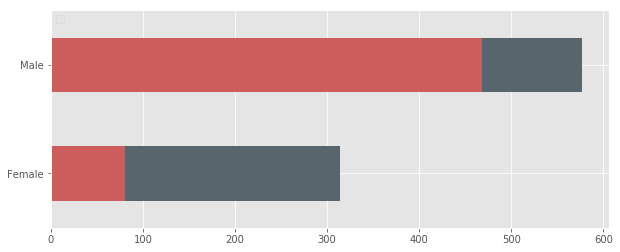

In [3]:
female = train[train['Sex']=='female']['Survived'].value_counts()
male = train[train['Sex']=='male']['Survived'].value_counts()

sex_split = pd.DataFrame([female,male])
sex_split.index = ['Female','Male']
sex_split.plot(kind='barh',stacked=True, color = ['#CD5C5C', '#59656d'], figsize=(10,4), label=("Dead", "Survived"))
plt.legend("Dead", "Survived", loc="upper left")
plt.show()

### Variable visualization

In [ ]:
train.plot(kind='density', subplots=True, layout=(4,2),figsize=(10,10), sharex=False)
plt.show()

### Correlation matrix

In [ ]:
corr = train.corr()
corr = (corr)
plt.figure(figsize= (10,5))
corr_heatmap = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### Sex vs Survival

In [ ]:
survived_label = 'survived'
dead_label = 'dead'
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.distplot(train[train['Survived']==1].Age.dropna(), bins=20, label = survived_label, ax = ax)
ax = sns.distplot(train[train['Survived']==0].Age.dropna(), bins=20, label = dead_label, ax = ax, color ='#59656d')
ax.legend()

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = train[train['Sex']=='female']
male = train[train['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=30, label = survived_label, ax = axes[0],color = '#f7879a', kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=30, label = dead_label, ax = axes[0], color = '#59656d', kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=30, label = survived_label, ax = axes[1],color = '#0804f9',kde =False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=30, label = dead_label, ax = axes[1],color = '#436bad',kde =False)
ax.legend()
_ = ax.set_title('Male')
plt.show()

### Fare vs Survival

In [ ]:
survived_label = 'survived'
dead_label = 'dead'

p1=sns.kdeplot(train[train['Survived']==1]['Fare'],label = survived_label, shade=True, color='#CD5C5C', )
p1=sns.kdeplot(train[train['Survived']==0]['Fare'], label = dead_label,shade=True, color='#59656d')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.show()

### Age vs Fare vs Survival

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='#CD5C5C',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='#59656d',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=10)
plt.show()

### Average fare vs Class

In [ ]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", palette=['#CD5C5C','#59656d'], data=train)
ax.set_yscale('log')
plt.show()

### Embarked vs Survival

In [ ]:
tab = pd.crosstab(train['Embarked'],train['Survived'])
print(tab)
plt.figure(figsize=(12,6))
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
tab_prop.plot(kind="bar", stacked=True, colors= ['#CD5C5C', '#59656d'])
plt.show()

# ---- 2. LOADING DATA

In [4]:
# We are going to perform several modifications, and we need to apply these modifications on both train set and test 
# set in order to have the same features at the end. The function "concat_data" concatenates the train and the sets 
# together, saving the target feature "Survived" from the train file into another variable.


def concat_data():

    train = pd.read_csv('Data/train.csv',sep=';')
    test = pd.read_csv('Data/test.csv',sep=';')

    target = train.Survived
    
    all_data = train.append(test)
    all_data.reset_index(inplace=True)
    all_data.drop('index', inplace=True, axis=1)
    
    return all_data, target

In [5]:
data, target = concat_data()

# ---- 3. DATA PREPROCESSING (cleaning and feature engineering)

## 3.1/ Using the feature "Name"

### Social titles

In [6]:
# The "Name" feature contains a part about the title of every passenger, it can be interesting to keep only the title
data['Title']=data['Name'].str.split(', ').str[1].str.split('.').str[0]

def social_titles(x):
    title=x['Title']
    if title in ['Capt','Col','Major','Dr','Rev']:
        return '1'
    elif title in ['Jonkheer','Don','Sir','the Countess','Dona','Lady']:
        return '2'
    elif title in ['Mme','Ms','Mrs']:
        return '3'
    elif title in ['Mlle','Miss']:
        return '4'
    elif title=='Mr':
        return '5'
    elif title=='Master':
        return '6'
    else:
        return title


In [7]:
data['TitleCat']=data.apply(social_titles, axis=1)

### Marital status

In [8]:
# The "Name" feature contains a part about the title of every passenger, it can be interesting to keep only the title
# and use it to create a new feature : the marital status
data['Marital']=data['Name'].str.split(', ').str[1].str.split('.').str[0]

def marital_status(x):
    title=x['Title']
    if title in ['Capt','Col','Major','Jonkheer','Sir','Mr','Master','Don','Dr','Rev']:
        return 'Mr'
    elif title in ['Mme','the Countess','Dona','Lady','Ms','Mrs']:
        return 'Mrs'
    elif title in ['Mlle','Miss']:
        return 'Miss'
    else:
        return title    

data['Marital']=data.apply(marital_status, axis=1)

###  Married

In [9]:
data['Family_name']=data['Name'].str.split(',').str[0]

In [10]:
data['Married']=np.zeros(len(data))

idx_mrs=data.loc[(data['Marital']=='Mrs') & (data['Sex']=='female')].index
names=data.loc[idx_mrs,'Family_name'].values
idx_mr=data.loc[(data['Family_name'].isin(names)) & (data['Sex']=='male') & (data['Age']>18)].index

data.loc[idx_mr,'Married']=1
data.loc[idx_mrs,'Married']=1

###  Name Lenght

In [11]:
data['NameLength'] = data.Name.apply(lambda x: len(x))

## 3.2/ Cabin

In [12]:
# For missing values, we will inpute the value "0" 
data.Cabin.fillna('0', inplace=True)
# We will keep only the first letter of the cabin
# Since it is a qualitative variable, we affect a code

data['CabinCat'] = pd.Categorical.from_array(data.Cabin.fillna('0').apply(lambda x: x[0])).codes


/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


## 3.3/ Family

In [13]:
# A new feature is created here : the size of the family
data['Family_size'] = data['SibSp'] + data['Parch'] + 1

## 3.4/ Fares

#### Missing values

In [14]:
# For missing values for "Fare" we replace by the median
data.loc[data['Fare'].isnull(), 'Fare'] = np.median(data.Fare[data.Fare.notnull()])    


## 3.5/  Tickets number

In [15]:
# The function "extract_ticket" returns the prefix of the feature "Ticket", if there's no prefix, it returns '---'.
def extract_prefix(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = filter(lambda t : not t.isdigit(), ticket)
    if len(ticket) > 0:
        return ticket[0].upper()
    else: 
        return '---'

# As it is a qualitative variable we have to convert it into dummies
data['Ticket'] = data['Ticket'].map(extract_prefix)
tickets_dummies = pd.get_dummies(data['Ticket'], prefix='Ticket')
data = pd.concat([data, tickets_dummies], axis=1)


In [16]:
data.drop(['Ticket'], axis=1, inplace=True)

## 3.6/ Embarked

In [17]:
# For missing values for "Embarked", which is a qualitative feature, we use the most frequent character, store in 
# the variable 'char'.

char=data['Embarked'].value_counts().sort_values(ascending=False).index[0]
idx=data['Embarked'].loc[data['Embarked'].isnull()==True].index
data.loc[idx,'Embarked']=char

# As it is a qualitative variable, we perform a codification
data['EmbarkedCat'] = pd.Categorical.from_array(data.Embarked).codes


/Users/sarahlina/Documents/Documents/Dev/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':


## 3.8/ Sex

In [18]:
# Transform 'Sex' feature into numeric levels, 0 for male and 1 for female 
idx_m=data.loc[data['Sex']=='male'].index
idx_f=data.loc[data['Sex']=='female'].index

data.loc[idx_m,'Sex']=0
data.loc[idx_f,'Sex']=1

data['Sex']=pd.to_numeric(data['Sex'])

## 3.7/ Age

### Missing values

- As 'Age' might be very significant, a more sophisticated way to inpute missing values can be used. 
- Instead of replace by the mean of the whole dataset, we will use ExtraTreesRegressor which is a tree to predict the value of the age according to 'Fare','Parch','Pclass','SibSp','TitleCat','CabinCat','Sex', 'EmbarkedCat', 'Family_size', 'NameLength'

In [19]:
from sklearn.ensemble import ExtraTreesRegressor


classers = ['Fare','Parch','Pclass','SibSp','TitleCat','CabinCat','Sex', 'EmbarkedCat', 'Family_size', 'NameLength']

age_et = ExtraTreesRegressor(n_estimators=200)

X_train = data.loc[data.Age.notnull(),classers]
Y_train = data.loc[data.Age.notnull(),['Age']]

X_test = data.loc[data.Age.isnull(),classers]


age_et.fit(X_train,np.ravel(Y_train))
age_preds = age_et.predict(X_test)
data.loc[data.Age.isnull(),['Age']] = age_preds

### Categorization according to age and sex

In [20]:
child_age = 14
def get_person(passenger):
    age, sex = passenger
    if (age < child_age):
        return 'child'
    elif (sex == 1):
        return 'female_adult'
    else:
        return 'male_adult'
    
data = pd.concat([data, pd.DataFrame(data[['Age', 'Sex']].apply(get_person, axis=1), columns=['person'])],axis=1)
#We transform it in a dummie to make it numerica
dummies = pd.get_dummies(data['person'])
data = pd.concat([data,dummies],axis=1)

## 3.3/ Persihing Females

In [21]:
perishing_female_surnames = list(set(data[(data.female_adult == 1.0) &
                                     (data.Survived == 0.0) &
                                     ((data.Parch > 0) | (data.SibSp > 0))]['Family_name'].values))

def perishing_mother_wife(passenger): 
    familyname, Pclass, person = passenger
    return 1.0 if (familyname in perishing_female_surnames) else 0.0

data['perishing_mother_wife'] = data[['Family_name', 'Pclass', 'person']].apply(perishing_mother_wife, axis=1)

## 3.5/ Survivng Males

In [22]:
#### Survivng Males
surviving_male_surnames = list(set(data[(data.male_adult == 1.0) &
                                     (data.Survived == 1.0) &
                                     ((data.Parch > 0) | (data.SibSp > 0))]['Family_name'].values))
def surviving_father_husband(passenger): 
    familyname, Pclass, person = passenger
    return 1.0 if (familyname in surviving_male_surnames) else 0.0

data['surviving_father_husband'] = data[['Family_name', 'Pclass', 'person']].apply(surviving_father_husband, axis=1)

## Delete the non useful features that have been used to create other more significant ones

In [23]:
# Features like "Name", "Family_name" and "Marital" were used to create interesting features but may be not useful for
# the modelling part
data.drop('Marital',axis=1,inplace=True)
data.drop('Family_name',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('person',axis=1,inplace=True)
data.drop('Cabin', axis=1, inplace=True)  
data.drop('Embarked',axis=1,inplace=True)
data.drop('Title',axis=1,inplace=True)
data.drop('Survived',axis=1,inplace=True)


## 3.10/ Verifications for missing values

In [24]:
for c in data.columns :
    if data[c].isnull().sum() == 0 :
        print c, ': OK'
    else :
        print c, ': Still missing values'

Age : OK
Fare : OK
Parch : OK
PassengerId : OK
Pclass : OK
Sex : OK
SibSp : OK
TitleCat : OK
Married : OK
NameLength : OK
CabinCat : OK
Family_size : OK
Ticket_--- : OK
Ticket_A : OK
Ticket_A4 : OK
Ticket_A5 : OK
Ticket_AQ3 : OK
Ticket_AQ4 : OK
Ticket_AS : OK
Ticket_C : OK
Ticket_CA : OK
Ticket_CASOTON : OK
Ticket_FA : OK
Ticket_FC : OK
Ticket_FCC : OK
Ticket_LINE : OK
Ticket_LP : OK
Ticket_PC : OK
Ticket_PP : OK
Ticket_PPP : OK
Ticket_SC : OK
Ticket_SCA3 : OK
Ticket_SCA4 : OK
Ticket_SCAH : OK
Ticket_SCOW : OK
Ticket_SCPARIS : OK
Ticket_SOC : OK
Ticket_SOP : OK
Ticket_SOPP : OK
Ticket_SOTONO2 : OK
Ticket_SOTONOQ : OK
Ticket_SP : OK
Ticket_STONO : OK
Ticket_STONO2 : OK
Ticket_STONOQ : OK
Ticket_SWPP : OK
Ticket_WC : OK
Ticket_WEP : OK
EmbarkedCat : OK
child : OK
female_adult : OK
male_adult : OK
perishing_mother_wife : OK
surviving_father_husband : OK


# ---- 4. FEATURE SELECTION

## 4.1/ Using PCA

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_combined = preprocessing.normalize(combined, norm='l2')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
pca.explained_variance_ratio_
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquee")
plt.show()

In [ ]:
plt.figure(1, figsize=(10, 10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

## 4.1/ Using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

train = data.head(891)
test = data.iloc[891:]

featureSelector = SelectKBest(chi2,k=20) 
train= featureSelector.fit_transform(train,targets)
test = featureSelector.transform(test)

# ---- 5. MODELS

In [25]:
train = data.head(891)
test = data.iloc[891:]

In [26]:
# Function that computes the score using cross validation
def score_cv(model, X, y, scoring='accuracy'):
    s = cross_val_score(model, X, y, cv = 5, scoring=scoring)
    return np.mean(s)

In [27]:
# K : used into the function 'GridSearchCV' for parameters tuning, represents the number of folds 
# in the cross validation
K=10

## 5.1/ Random Forest

### Without parameters tuning

In [28]:
rf = RandomForestClassifier()
rf = rf.fit(train, target)

In [29]:
score_cv(rf, train, target, scoring='accuracy')

0.85973103642225479

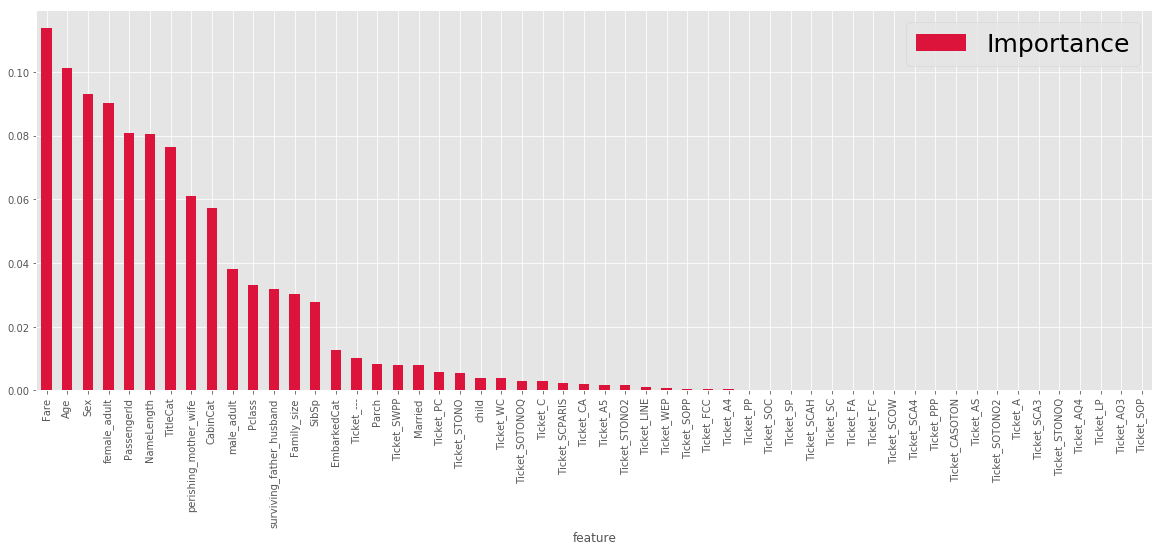

In [30]:
features = pd.DataFrame()
features['feature'] = train.columns
features['Importance'] = rf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='bar', figsize=(20, 7), color='crimson')
plt.legend(['Importance'],prop=({'size':25}))
plt.show()

We can see clearly the features that have the most importance in random forest, thus we have decided to work with the following subset of features ['Age','male_adult', 'female_adult', 'child','perishing_mother_wife','surviving_father_husband','Fare','Parch','Pclass','SibSp','TitleCat','CabinCat','Sex', 'EmbarkedCat', 'Family_size', 'NameLength']

In [31]:
features_selected = ['Age','male_adult', 'female_adult', 'child','perishing_mother_wife','surviving_father_husband','Fare','Parch','Pclass','SibSp','TitleCat','CabinCat','Sex', 'EmbarkedCat', 'Family_size', 'NameLength']

train_data = data.head(891)
test_data = data.iloc[891:]


train = train_data.loc[:,features_selected]
test = test_data.loc[:,features_selected]  

### With parameters tuning

In [32]:
##### n_estimators
#Range of parameters
param=[{"n_estimators":[10,50,100,500,1000]}]
rForest2= GridSearchCV(RandomForestClassifier(random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(train, target)
# Optimal parameter
n_est=rForestOpt.best_params_['n_estimators']
print n_est

500


In [ ]:
score_cv(rForestOpt, train, target, scoring='accuracy')

In [33]:
#max_features represents the maximum number of features that will be used in the model
#Range of parameters
param=[{"max_features":["auto","sqrt","log2"]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=n_est,random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(train, target)

# paramètre optimal
max_f=rForestOpt.best_params_['max_features']
print max_f

auto


In [ ]:
score_cv(rForestOpt, train, target, scoring='accuracy')

In [ ]:
#Range of parameters
param=[{"min_samples_leaf":[3,5,7,10]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=n_est,max_features=max_f,random_state=1),
        param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(train, target)
# Optimal parameter
min_sl=rForestOpt.best_params_['min_samples_leaf']
print min_sl

In [ ]:
score_cv(rForestOpt, train, target, scoring='accuracy')

In [ ]:
#Range of parameters
param=[{"min_samples_split":[5,7,10,15]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=n_est,max_features=max_f,min_samples_leaf=min_sl,
                                              random_state=1),
                       param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(train, target)
# Optimal parameter
min_ss=rForestOpt.best_params_['min_samples_split']
print min_ss

In [ ]:
score_cv(rForestOpt, train, target, scoring='accuracy')

In [ ]:
#Range of parameters
param=[{"max_depth":[10,50,100,500]}]
rForest2= GridSearchCV(RandomForestClassifier(n_estimators=n_est,max_features=max_f,min_samples_leaf=min_sl,
                                             min_samples_split=min_ss,random_state=1),
                       param,cv=K,n_jobs=-1)
rForestOpt=rForest2.fit(train, target)
# Optimal parameter
max_d=rForestOpt.best_params_['max_depth']
print max_d

In [ ]:
score_cv(rForestOpt, train, target, scoring='accuracy')

#### Summary and Final model

In [ ]:
### Model with best param
print 'n_estimators : ',n_est
print 'max_feature : ', max_f
print 'min_samples_leaf : ', min_sl
print 'min_samples_split : ', min_ss
print 'max_depth : ', max_d

In [ ]:
model=RandomForestClassifier(n_estimators=n_est,max_features=max_f,min_samples_leaf=min_sl,max_depth=max_d,
                            min_samples_split=min_ss,random_state=1)
model.fit(train, target)
score_cv(model, train, target, scoring='accuracy')

In [ ]:
pred = model.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_rf_opt.csv',index=False)

## 5.2/ SVM

### Without parameters tuning

In [ ]:
svm_ = svm.SVC()
svm_.fit(train, target)
score_cv(svm_, train, target, scoring='accuracy')

### With parameters tuning

In [ ]:
#Range of parameters
param=[{"kernel":['linear','rbf']}]
svm= GridSearchCV(svm.SVC(),param,cv=K,n_jobs=-1)
svmOpt=rForest2.fit(train, targets)
# Optimal parameter
ker= svmOpt.best_params_['kernel']

In [ ]:
#Range of parameters
param=[{"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}]
svm= GridSearchCV(svm.SVC(kernel=kernel),param,cv=K,n_jobs=-1)
svmOpt=rForest2.fit(train, targets)
# Optimal parameter
gam= svmOpt.best_params_['gamma']

In [ ]:
#Range of parameters
param=[{"C":[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
svm= GridSearchCV(svm.SVC(kernel='linear',gamma=0.1),param,cv=K,n_jobs=-1)
svmOpt=rForest2.fit(train, targets)
# Optimal parameter
c=rForestOpt.best_params_['C']

#### Summary and Final model

In [ ]:
### Model with best param
print 'kernel : ',ker
print 'gamma : ', gam
print 'c : ', c

In [ ]:
model=svm.SVC(kernel=ker ,C= c,gamma=gam)

model.fit(train, target)
score_cv(model, train, target, scoring='accuracy')

In [ ]:
pred = model.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_svm_opt.csv',index=False)

## 5.3/ Logistic Regression

### Without parameters tuning

In [ ]:
regLog = linear_model.LogisticRegression()
log = regLog.fit(train, target)

In [ ]:
score_cv(log, train, target, scoring='accuracy')

In [ ]:
pred = log.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_log_noopt.csv',index=False)

### With parameters tuning

In [ ]:
param = {'C':[0.5,1,3,5,7]}
gsearch = GridSearchCV(estimator = linear_model.LogisticRegression(random_state=5),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

log=gsearch.fit(train,target)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
C=log.best_params_['C']
print C

In [ ]:
regLog = linear_model.LogisticRegression(C=C,random_state=5)
log = regLog.fit(train, target)
score_cv(log, train, target, scoring='accuracy')

In [ ]:
pred = log.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_log_opt.csv',index=False)

## 5.4/ K Nearest Neighbors

In [ ]:
n_neighbors = 25

# a. weights = uniform 
clf_unif = KNeighborsClassifier(n_neighbors, weights='uniform')
model_knn_unif=clf_unif.fit(train, target)

# b. weights = distance 
clf_dist = KNeighborsClassifier(n_neighbors, weights='distance')
model_knn_dist=clf_dist.fit(train, target)

In [ ]:
score_cv(model_knn_unif,train, target, scoring='accuracy')

In [ ]:
score_cv(model_knn_dist,train, target, scoring='accuracy')

In [ ]:
pred = model_knn_dist.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_knn.csv',index=False)

## 5.5/ Neural Network

### Without parameters tuning

In [ ]:
nnet = MLPClassifier()
mod_nnet = nnet.fit(train, target)

In [ ]:
score_cv(mod_nnet, train, target, scoring='accuracy')

In [ ]:
pred = mod_nnet.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_nnet_noopt.csv',index=False)

### With parameters tuning

In [ ]:
param = {'hidden_layer_sizes':[(10,),(50,),(100,)]}
gsearch5 = GridSearchCV(estimator = MLPClassifier(random_state=15),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

mod_nnet=gsearch5.fit(train,target)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_
hls=mod_nnet.best_params_['hidden_layer_sizes']

In [ ]:
param = {'alpha':[0.0001,0.001,0.01,0.1,0.00001]}
gsearch = GridSearchCV(estimator = MLPClassifier(hidden_layer_sizes=hls,random_state=15),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

mod_nnet=gsearch.fit(train,target)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
a=mod_nnet.best_params_['alpha']

In [ ]:
param = {'learning_rate':['constant', 'invscaling', 'adaptive']}
gsearch = GridSearchCV(estimator = MLPClassifier(hidden_layer_sizes=hls,alpha=a,random_state=15),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

mod_nnet=gsearch.fit(train,target)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
lr=mod_nnet.best_params_['learning_rate']

In [ ]:
param = {'solver':['lbfgs', 'sgd', 'adam']}
gsearch = GridSearchCV(estimator = MLPClassifier(hidden_layer_sizes=hls,alpha=a,learning_rate=lr,random_state=15),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

mod_nnet=gsearch.fit(train,target)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
solv=mod_nnet.best_params_['solver']

In [ ]:
param = {'activation':['identity', 'logistic', 'tanh', 'relu']}
gsearch = GridSearchCV(estimator = MLPClassifier(hidden_layer_sizes=hls,alpha=a,learning_rate=lr,solver=solv,
                                                random_state=15),
                        param_grid = param, n_jobs=-1,iid=False, cv=K)

mod_nnet=gsearch.fit(train,target)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
act=mod_nnet.best_params_['activation']

#### Final model

In [ ]:
mod_nnet2 = MLPClassifier(hidden_layer_sizes=hls,alpha=a,learning_rate=lr,solver=solv,activation=act,random_state=15)
mod_nnet_final=mod_nnet2.fit(train,target)

In [ ]:
score_cv(mod_nnet_final, train, targets, scoring='accuracy')

In [ ]:
pred = mod_nnet_final.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_nnet_opt.csv',index=False)

## 5.6/ Gradient Boosting

### Without parameters tuning

In [ ]:
gbm = GradientBoostingClassifier()
mod_gbm = gbm.fit(train,target)

score_cv(gbm, train, target, scoring='accuracy')

In [ ]:
pred = gbm.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_gbm_noopt.csv',index=False)

### With parameters tuning

In [ ]:
param_test1 = {'n_estimators':[10,100,500,1000]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                                               min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, n_jobs=-1,iid=False, cv=K)

gbmOpt=gsearch1.fit(train, target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
n_est=gbmOpt.best_params_['n_estimators']

In [ ]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=n_est, 
                                                              max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, n_jobs=-1,iid=False, cv=K)

gbmOpt=gsearch2.fit(train, target)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_
max_d=gbmOpt.best_params_['max_depth']
min_ss=gbmOpt.best_params_['min_samples_split']

In [ ]:
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=n_est,max_depth=max_d, 
                                                              min_samples_split=min_ss,max_features='sqrt', 
                                                              subsample=0.8, random_state=10), 
                        param_grid = param_test3, n_jobs=-1,iid=False, cv=K)

gbmOpt=gsearch3.fit(train,target)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_
min_sl=gbmOpt.best_params_['min_samples_leaf']

In [ ]:
param_test4 = [{"max_features":["auto","sqrt","log2"]}]
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=n_est,max_depth=max_d, 
                                                              min_samples_split=min_ss, min_samples_leaf=min_sl, 
                                                              subsample=0.8,random_state=10),
                        param_grid = param_test4, n_jobs=-1,iid=False, cv=K)

gbmOpt=gsearch4.fit(train,target)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_
max_f=gbmOpt.best_params_['max_features']

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=n_est,max_depth=max_d,
                                                              min_samples_split=min_ss, min_samples_leaf=min_sl, 
                                                              subsample=0.8, random_state=10,max_features=max_f),
                        param_grid = param_test5, n_jobs=-1,iid=False, cv=K)

gbmOpt=gsearch5.fit(train, target)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_
subs=gbmOpt.best_params_['subsample']

#### Summary and Final model

In [ ]:
print 'n_estimators :', n_est
print 'min_samples_split :', min_ss
print 'min_samples_leaf :', min_sl
print 'max_depth :', max_d
print 'max_features :', max_f
print 'subsample :', subs

In [ ]:
gbm6=GradientBoostingClassifier(n_estimators =n_est,learning_rate=0.01, min_samples_split=min_ss,
                               min_samples_leaf=min_sl,max_depth=max_d,max_features=max_f,subsample=subs,
                               random_state=10) 

gbm_final=gbm6.fit(train,target)
score_cv(gbm_final, train, target, scoring='accuracy')

In [ ]:
pred = gbm_final.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_gbm_opt.csv',index=False)

## 5.7/ XGBoost

### Without parameters tuning

In [ ]:
xgb1=xgb.XGBClassifier()
xgb1 = xgb1.fit(train, target)

score_cv(xgb1, train, target, scoring='accuracy')

In [ ]:
pred = xgb1.predict(test).astype(int)
temp = pd.read_csv('Data/test.csv',sep=';')

df = pd.DataFrame()
df['PassengerId'] = temp['PassengerId']
df['Survived'] = pred
df[['PassengerId','Survived']].to_csv('output_xgb_noopt.csv',index=False)

### With parameters tuning (need more powerful computer to run this part)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                      min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                      objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                                                      seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch1.fit(train,target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
max_d=gsearch1.best_params_['max_depth']
min_cw=gsearch1.best_params_['in_child_weight']

In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=max_d,
                                                      min_child_weight=min_cw, gamma=0, subsample=0.8, 
                                                      colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, 
                                                      scale_pos_weight=1,seed=27), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch2.fit(train,target)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_
g=gsearch2.best_params_['gamma']

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=177, max_depth=max_d,
                                                      min_child_weight=min_cw, gamma=g, subsample=0.8, 
                                                      colsample_bytree=0.8,objective= 'binary:logistic', nthread=4, 
                                                      scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch3.fit(train,target)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_
subs=gsearch3.best_params_['subsample']
cls_bt=gsearch3.best_params_['colsample_bytree']

In [ ]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=177, max_depth=max_d,
                                                      min_child_weight=min_cw, gamma=g, subsample=subs, 
                                                      colsample_bytree=cls_bt,objective= 'binary:logistic', nthread=4, 
                                                      scale_pos_weight=1,seed=27), 
                        param_grid = param_test4, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch4.fit(train,target)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_
reg_a=gsearch4.best_params_['reg_alpha']

In [ ]:
xgb2 = XGBClassifier(learning_rate=0.01,n_estimators=500,max_depth=max_d,min_child_weight=min_cw,gamma=g,
                     subsample=subs,colsample_bytree=cls_bt,reg_alpha=reg_a,objective='binary:logistic',
                     nthread=4,scale_pos_weight=1,seed=27)

xgb2.fit(train, target)

## 5.8/ Voting with the 2 best models

In [ ]:
clf1 = RandomForestClassifier(n_estimators=n_est,max_features=max_f,min_samples_leaf=min_sl,max_depth=max_d,
                            min_samples_split=min_ss,random_state=1 ,class_weight={0:0.745,1:0.255})
clf2 = svm.SVC(kernel='linear',C=0.8,gamma=0.1)


eclf1 = VotingClassifier(estimators=[('rf', clf1), ('svm', clf2)] , voting='hard')
eclf1 = eclf1.fit(train, target)


output = eclf1.predict(test).astype(int)
aux = pd.read_csv('Data/test.csv',sep=';')

df_output = pd.DataFrame()
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('results/output_voting_kaggle_sub.csv',index=False)

# ---- 6. MODELS COMPARISON

## 6.1/ Performances comparison on training set

In [ ]:
check_random_state(13)
tps0=time.clock()
K=9

# Classifiers
logi = linear_model.LogisticRegression(C=10)

rf   = RandomForestClassifier(n_estimators=500,min_samples_leaf=5,max_depth=10,min_samples_split=10,
                             max_features='sqrt',random_state=1)

boost = xgb.XGBClassifier(silent=1, seed=0, base_score=0.5, max_delta_step= 0,subsample=0.75, 
                          max_depth= 10, min_child_weight= 2, n_estimators= 280,colsample_bytree= 0.65, gamma= 2)

nnet = MLPClassifier(solver='lbfgs', alpha=0.00001,activation='identity',learning_rate='adaptive',
                     hidden_layer_sizes=(100,))

knn_dist = KNeighborsClassifier(n_neighbors=25, weights='distance')

gbm = GradientBoostingClassifier(n_estimators=500,min_samples_split=600,min_samples_leaf=50,max_depth=7,
                                 max_features='sqrt',subsample=0.9,random_state=10)

svm_  = svm.SVC()

# Number of iterations
B=50 # to test the loop : use B=3 instead

# Parameters grids
listMethGrid=[rf,nnet,gbm,boost,svm_,logi,knn_dist]

arrayErreur=np.empty((B,8))

for i in range(B):
    #print i
    X_train,X_test,Y_train,Y_test=train_test_split(train,target,test_size=0.15)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    
    # Computation of test error
    for j,method in enumerate(listMethGrid):
        methFit=method.fit(X_train, Y_train)
        arrayErreur[i,j]=methFit.score(X_test,Y_test)
        
tps1=time.clock()
print("Temps execution en mn :",(tps1 - tps0)/60)

dataframeErreur=pd.DataFrame(arrayErreur,columns=["RF","NNET","GBM","XGB","SVM","Logit","KNN","..."])    

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
dataframeErreur[["RF","NNET","GBM","XGB","SVM","Logit","KNN"]].boxplot(return_type='dict')
dataframeErreur.to_csv('dataframeErreur_B50.csv',index=None)
ax.set_xticklabels(["RF","NNET","GBM","XGB","SVM","Logit","KNN"],fontsize=30)
plt.show()

## 6.2/ Kaggle scores

In [ ]:
kagg=pd.read_csv('kaggle_scores.csv',sep=';')

In [ ]:
# Setting the positions and width for the bars
width = 0.25
pos = list(range(len(kagg['With'])))

 
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar([p + 0.1 for p in pos],kagg['Without'],width,color='darkcyan') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + 0.4 for p in pos],kagg['With'],width,color='crimson') 
#label='With parameters tuning',label='Without parameters tuning'

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Kaggle scores comparison')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(kagg['Model'],fontsize=22)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1] )

# Adding the legend and showing the plot
plt.legend(['Without parameters tuning', 'With parameters tuning', 'Post Score'], loc='upper left',
          prop={'size': 18})
plt.grid()
plt.show()